# Assignement 2

### <span style="color:chocolate"> Submission requirements </span>

Your homework will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:

    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Define functions

In [2]:
def create_1d_data(num_examples, w, b, bound):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    bound: lower and upper boundary of the data interval

  Returns:
    X and Y with shape (num_examples)
  """
  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples)
  deltas = np.random.uniform(low=-bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y

---
### Step 1: Data ingestion

Let's start by creating some artificial data using the <span style="color:chocolate">create_1d_data()</span> function defined at the top of the notebook.

In [3]:
# Define parameters
num_examples = 70
w = 2
b = 1
bound = 1

# Create data
X, Y = create_1d_data(num_examples, w, b, bound)

# Print shapes
print('Printing shape of X:', X.shape)
print('Printing first 10 elements in X:', X[:10])
print('\nPrinting shape of Y:', Y.shape)
print('Printing first 10 elements in Y:', Y[:10])

Printing shape of X: (70,)
Printing first 10 elements in X: [0 1 2 3 4 5 6 7 8 9]

Printing shape of Y: (70,)
Printing first 10 elements in Y: [ 1.93405968  3.0944645   5.94536872  7.42963199  9.39545765 10.43217899
 13.95254891 14.01246051 16.50596472 18.86958306]


---
### Step 2: Data Preprocessing

Our objectives here involve adding one more feature to X and creating data partitions.

### <span style="color:chocolate">Exercise 1:</span> Adding features (10 points)

1. Add a column of $1s$ to $X$ (this will serve as an intercept or "bias" in our modeling task later on). Note: do not create a new array, just concatenate with the current values;
2. Print the shape of the array.

In [4]:
X = np.array([np.ones(X.shape[0]), X]).T

In [5]:
X[:10]

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.],
       [1., 9.]])

### <span style="color:chocolate">Exercise 2:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Split the (X,Y) data into training and test paritions by setting test_size=0.2 and random_state=1234. All the other arguments of the method are set to default values. Name the resulting arrays X_train, X_test, Y_train, Y_test;
2. Print the shape of each array.

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
print(f"{X_train.shape=}")
print(f"{X_test.shape=}")
print(f"{Y_train.shape=}")
print(f"{Y_test.shape=}")

X_train.shape=(56, 2)
X_test.shape=(14, 2)
Y_train.shape=(56,)
Y_test.shape=(14,)


---
### Step 3: Exploratory data analysis (EDA)

### <span style="color:chocolate">Exercise 3:</span> Plots (10 points)

Create a side-by-side histogram for the values in Y_train and X_train. Make sure to include axes name and titles for each subplot.

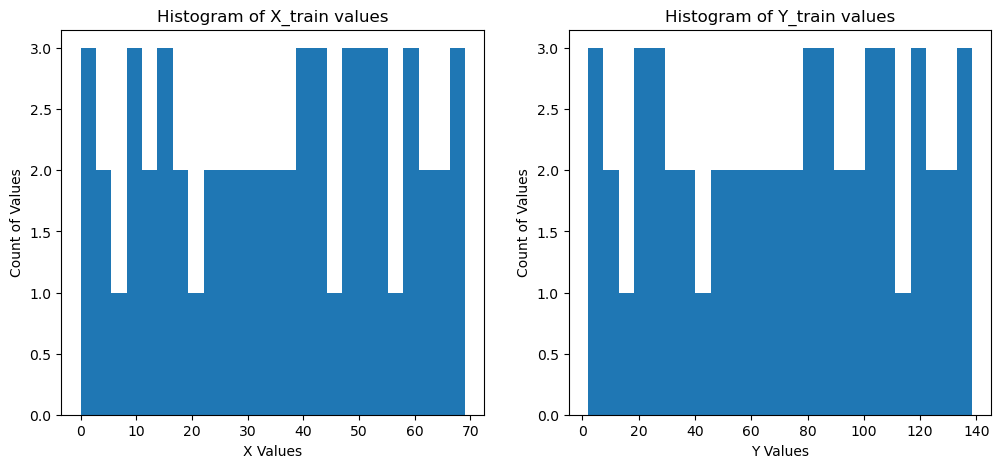

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(X_train[:, [1]], bins=25)
axes[0].set_xlabel("X Values")
axes[0].set_ylabel("Count of Values")
axes[0].set_title(f"Histogram of X_train values")

axes[1].hist(Y_train, bins=25)
axes[1].set_xlabel("Y Values")
axes[1].set_ylabel("Count of Values")
axes[1].set_title(f"Histogram of Y_train values")

fig.show()

---
### Step 4: Modeling

Let's start by considering the two models proposed in Assignment 1:
1. $M_1(x) = 5+x$ 
2. $M_2(x) = 1+2x$

### <span style="color:chocolate">Exercise 4:</span> Practice with Parameters (10 points)

Perform the following computations:

1. Use matrix multiplication (np.dot) to create $M_1$ and $M_2$ (as previously defined) to produce vectors of predictions using the X_train data. Call these predictions M1_hat_train, M2_hat_train. Hint: the "learned" parameters are alredy provided to you;

3. Print the shapes of the predictions to verify that they match the shape of Y_train.

In [8]:
# Representing the models as vectors, so we can use matrix multiplication

model1 = np.array([5, 1])
M1_hat_train = np.dot(X_train, model1)

model2 = np.array([1, 2])
M2_hat_train = np.dot(X_train, model2)

print(f"{M1_hat_train=}")
print(f"{M2_hat_train=}")

print(f"{M1_hat_train.shape=}")
print(f"{M2_hat_train.shape=}")
print(f"{Y_train.shape=}")

M1_hat_train=array([55., 70., 26., 57., 50., 45., 18., 72., 32., 63., 15., 12., 36.,
       19., 22., 61., 37., 40., 47.,  6., 69., 24.,  7., 64., 56., 67.,
        5., 16., 44.,  8., 73., 39., 42., 17., 60., 74., 14., 21., 10.,
       33., 53., 59., 66., 49., 65., 48., 35., 31., 46., 28., 54., 20.,
       29., 58., 43., 52.])
M2_hat_train=array([101., 131.,  43., 105.,  91.,  81.,  27., 135.,  55., 117.,  21.,
        15.,  63.,  29.,  35., 113.,  65.,  71.,  85.,   3., 129.,  39.,
         5., 119., 103., 125.,   1.,  23.,  79.,   7., 137.,  69.,  75.,
        25., 111., 139.,  19.,  33.,  11.,  57.,  97., 109., 123.,  89.,
       121.,  87.,  61.,  53.,  83.,  47.,  99.,  31.,  49., 107.,  77.,
        95.])
M1_hat_train.shape=(56,)
M2_hat_train.shape=(56,)
Y_train.shape=(56,)


### <span style="color:chocolate">Exercise 5:</span> Learn parameters with Gradient Descent (20 points)

1. Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">gradient_descent()</span> function below. Hint: refer to ``02 Linear Regression_helper.ipynb file``;

2. Run this function with our artificial (X_train, Y_train) data . Set learning_rate = .0002 and num_epochs = 5. Print out the weights and loss after each epoch. 

3. Generate a plot with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title.

In [9]:
num_epochs = 5
for i in range(num_epochs):
    print(i)

0
1
2
3
4


In [10]:
def gradient_descent(inputs, outputs, learning_rate, num_epochs):
  """Apply the gradient descent algorithm to learn linear regression.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.

  Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # m = number of examples, n = number of features
  m, n = inputs.shape
  
  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1. 
  W = np.ones(n)
  
  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []
  print(f"\nGradient Descent called with {learning_rate=}, {num_epochs=}")
  for epoch in range(num_epochs):
    # Append the old weights to the weights list to keep track of them.
    weights.append(W)

    # Evaluate the current predictions for the training examples given
    # the current estimate of W. 
    predictions = np.dot(inputs, W) 
    
    # Find the difference between the predictions and the actual target
    # values.
    diff = outputs - predictions
    
    # In standard linear regression, we want to minimize the sum of squared
    # differences. Compute the mean squared error loss. Don't bother with the
    # 1/2 scaling factor here.
    loss = (diff**2).sum()/m

    # Append the loss to the losses list to keep a track of it.
    losses.append(loss)
    
    # Compute the gradient with respect to the loss.
    # [Formula (4) in the Gradient Descent Implementation]
    gradient = inputs.T.dot(diff) / m

    # Update weights, scaling the gradient by the learning rate.
    W = W + learning_rate * gradient

    print(f"Epoch {epoch}: {W=}, {loss=}")
  # Append the final weights after the loop
  weights.append(W)
      
  return np.array(weights), np.array(losses)

In [11]:
inputs = X_train
outputs = Y_train
learning_rate = .0002
num_epochs = 5

weights, losses = gradient_descent(inputs, outputs, learning_rate, num_epochs)


Gradient Descent called with learning_rate=0.0002, num_epochs=5
Epoch 0: W=array([1.00709394, 1.33262886]), loss=np.float64(1665.3666608648086)
Epoch 1: W=array([1.01183193, 1.55469157]), loss=np.float64(742.4148662596615)
Epoch 2: W=array([1.01499708, 1.7029404 ]), loss=np.float64(331.0657262384294)
Epoch 3: W=array([1.01711221, 1.80191116]), loss=np.float64(147.73208292579974)
Epoch 4: W=array([1.01852634, 1.8679839 ]), loss=np.float64(66.0223586320446)


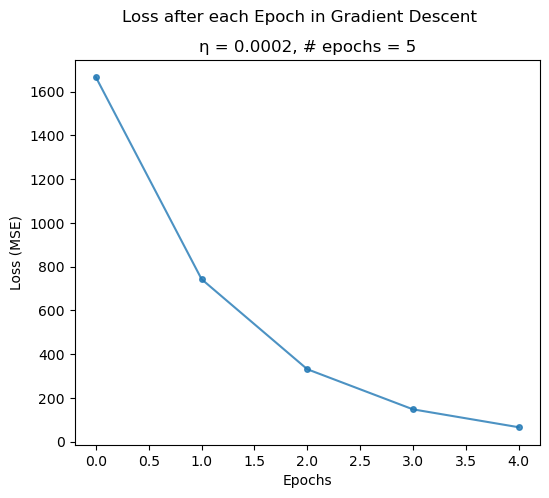

In [12]:
def ax_loss_plot(ax, losses, eta, yscale="log"):
    ax.plot(losses, marker='o', markersize=4, linestyle='-', alpha=0.8)
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss (MSE)")
    ax.set_yscale(yscale)
    ax.set_title(f"η = {eta}, # epochs = {len(losses)}")

fig, ax = plt.subplots(figsize=(6, 5))
fig.suptitle(f"Loss after each Epoch in Gradient Descent")
ax_loss_plot(ax, losses, learning_rate, yscale="linear")
fig.show()

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning plays an important role in optimizing ML models. One systematically adjusts hyperparameters to find the right balance between model complexity and generalization, ultimately leading to better predictive performance and model effectiveness.

Note that hyperparameter tuning is typically performed on **a separate validation dataset**. However, for the purposes of this assignment and based on the ML knowledge you've acquired thus far, we will perform hyperparameter tuning directly on the training data.

### <span style="color:chocolate">Exercise 6:</span> Tuning hyperparameters (10 points)

Answer the following questions:
    
1. Do you think it would be beneficial to extend the model training in Exercise 5 by increasing the learning rate to 0.02? Justify your answer;

2. Restoring to the previous learning_rate = .0002, would you  consider extending the model training in Exercise 5 by increasing the number of epochs to 10? Justify your answer.

Note: to support your answers, we recommend the following actions:
- create side-by-side subplots to show the loss at each epoch (make sure to include axes name and title), and
- print the loss at the last epoch under the following scenarios:
    - learning_rate=.0002, num_epochs=5;
    - learning_rate=.02, num_epochs=5;
    - learning_rate=.0002, num_epochs=10.


Gradient Descent called with learning_rate=0.0002, num_epochs=5
Epoch 0: W=array([1.00709394, 1.33262886]), loss=np.float64(1665.3666608648086)
Epoch 1: W=array([1.01183193, 1.55469157]), loss=np.float64(742.4148662596615)
Epoch 2: W=array([1.01499708, 1.7029404 ]), loss=np.float64(331.0657262384294)
Epoch 3: W=array([1.01711221, 1.80191116]), loss=np.float64(147.73208292579974)
Epoch 4: W=array([1.01852634, 1.8679839 ]), loss=np.float64(66.0223586320446)

Gradient Descent called with learning_rate=0.02, num_epochs=5
Epoch 0: W=array([ 1.70939419, 34.26288605]), loss=np.float64(1665.3666608648086)
Epoch 1: W=array([  -21.14077098, -1038.13576669]), loss=np.float64(1730683.4233130242)
Epoch 2: W=array([  715.57111348, 33536.08547039]), loss=np.float64(1798911746.516617)
Epoch 3: W=array([  -23036.06070114, -1081139.68066399]), loss=np.float64(1869830168587.4255)
Epoch 4: W=array([  742718.54314852, 34856099.64525089]), loss=np.float64(1943544404976517.2)

Gradient Descent called with l

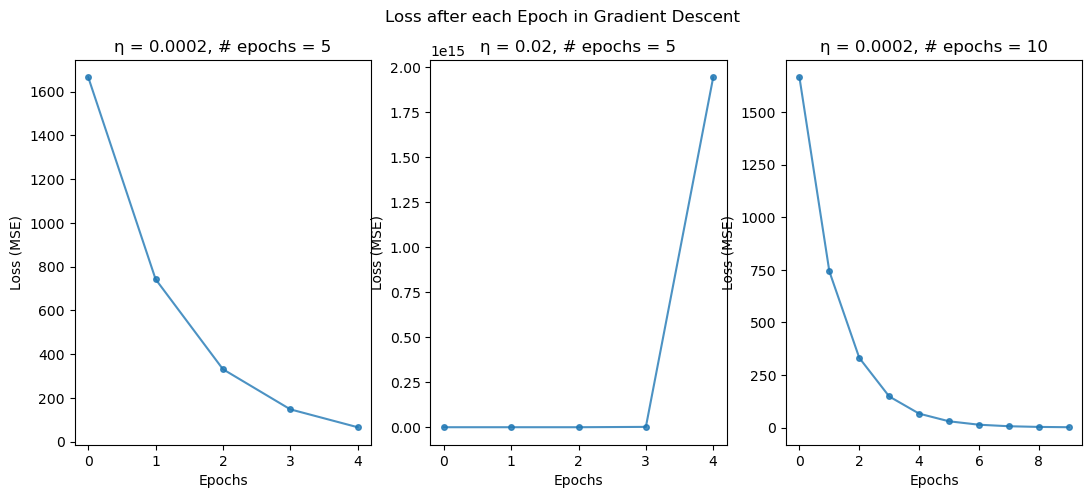

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
learning_rate1 = 0.0002
weights1, losses1 = gradient_descent(inputs, outputs, learning_rate1, 5)
ax_loss_plot(axes[0], losses1, learning_rate1, yscale="linear")

learning_rate2 = 0.02
weights2, losses2 = gradient_descent(inputs, outputs, learning_rate2, 5)
ax_loss_plot(axes[1], losses2, learning_rate2, yscale="linear")

learning_rate3 = 0.0002
weights3, losses3 = gradient_descent(inputs, outputs, learning_rate3, 10)
ax_loss_plot(axes[2], losses3, learning_rate3, yscale="linear")

fig.suptitle(f"Loss after each Epoch in Gradient Descent")
fig.show()

**1. Do you think it would be beneficial to extend the model training in Exercise 5 by increasing the learning rate to 0.02? Justify your answer;**

**Answer:**
No, do not increase the learning rate to 0.02. The increased value of learning rate (0.02) is too high. It misses the global minimum and leads to an ever increasing loss after each new epoch.

**2. Restoring to the previous learning_rate = .0002, would you consider extending the model training in Exercise 5 by increasing the number of epochs to 10? Justify your answer.**

**Answer:** 
Yes, we should increase the epochs. When the epochs change from 5 to 10 the loss decreases from 66 to 1.5. This is a meaningful increase in precision of our algorithm for little additional computation.


### <span style="color:chocolate">Exercise 7:</span> Choosing the best model (10 points)

Write down the learned model that you consider most optimal given your answers to the hyperparameter tuning exercise. Call this model $M_3(x)$.

In [14]:
model3 = weights3[-1]
M3_hat_train = np.dot(X_train, model3)

print(f"{model3=}")
print(f"{M3_hat_train=}")

model3=array([1.02101022, 1.98308738])
M3_hat_train=array([100.17537916, 129.92168984,  42.66584517, 104.14155391,
        90.25994226,  80.34450537,  26.80114614, 133.88786459,
        54.56436944, 116.04007819,  20.85188401,  14.90262187,
        62.49671896,  28.78423352,  34.73349566, 112.07390343,
        64.47980634,  70.42906847,  84.31068013,   3.0040976 ,
       127.93860246,  38.69967041,   4.98718498, 118.02316556,
       102.15846653, 123.9724277 ,   1.02101022,  22.83497138,
        78.36141799,   6.97027236, 135.87095197,  68.4459811 ,
        74.39524323,  24.81805876, 110.09081605, 137.85403935,
        18.86879663,  32.75040828,  10.93644711,  56.54745682,
        96.2092044 , 108.10772867, 121.98934032,  88.27685488,
       120.00625294,  86.2937675 ,  60.51363158,  52.58128207,
        82.32759275,  46.63201993,  98.19229178,  30.7673209 ,
        48.61510731, 106.12464129,  76.37833061,  94.22611702])


---
### Step 6: Evaluation and Generalization

To evaluate our models, we assess their performance based on how closely they fit the available data. In other words, we compare the true value $y$ with the predicted value $\hat{y}$ for each $x$.

### <span style="color:chocolate">Exercise 8:</span> Computing MSE (10 points)

Assess the performance of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) by computing the MSE metric on the training dataset. Hint: you can use the <span style="color:chocolate">mean_squared_error()</span> method available in sklearn.metrics.

In [15]:
print(f"{mean_squared_error(Y_train, M1_hat_train)=}")
print(f"{mean_squared_error(Y_train, M2_hat_train)=}")
print(f"{mean_squared_error(Y_train, M3_hat_train)=}")

mean_squared_error(Y_train, M1_hat_train)=1397.608983658733
mean_squared_error(Y_train, M2_hat_train)=0.3280557752885262
mean_squared_error(Y_train, M3_hat_train)=0.8393687909121693


### <span style="color:chocolate">Exercise 9:</span> Generalization (10 points)

Which of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) demonstrates better generalization ability? Hint: compare training vs. test MSE.

In [16]:
def predict_X_test(model):
    return np.dot(X_test, model)

print(f"{mean_squared_error(Y_test, predict_X_test(model1))=}")
print(f"{mean_squared_error(Y_test, predict_X_test(model2))=}")
print(f"{mean_squared_error(Y_test, predict_X_test(model3))=}")

mean_squared_error(Y_test, predict_X_test(model1))=1113.6003911560044
mean_squared_error(Y_test, predict_X_test(model2))=0.2908006971666422
mean_squared_error(Y_test, predict_X_test(model3))=0.6026016556635998


**Answer:**
The models show similar performance against the test data compared to the training data.
M1 performs the worst with MSE several orders of magnitude higher than either M2 or M3.
M2 is the most generalizable model, but only narrowly performs better than M3.

----
### <span style="color:chocolate">Exercise 10:</span> Additional practice (not graded)

1. How does stochastic gradient descent (SGD) differ from the gradient descent (GD) approach implemented in Exercise 5?
2. Determine the optimal weights for model $M_3(x)$ using SGD. Does SGD converge more rapidly? Explain the reasons for your answer.

Stochastic Gradient Descent updates the weights after each individual training example. In Exercise 5, we only updated the weights after we had calculated the errors for the entire input dataset.

In [17]:
def stochastic_gradient_descent(inputs, outputs, learning_rate, num_epochs):
  """Apply the stochastic gradient descent algorithm to learn linear regression.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.

  Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # m = number of examples, n = number of features
  m, n = inputs.shape
  
  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1. 
  W = np.ones(n)
  
  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []
  print(f"\nStochastic Gradient Descent called with {learning_rate=}, {num_epochs=}")
  for epoch in range(num_epochs):
    epoch_losses = []
    # Loop through the training data individually
    weights.append(W)
    for xi, yi in zip(inputs, outputs): 
        prediction = np.dot(xi, W)
        diff = yi - prediction
        loss = (diff**2)
        W = W + learning_rate * xi.dot(diff)/2
        epoch_losses.append(loss)
    losses.append(epoch_losses)
    print(f"Epoch {epoch}: {W=}, {loss=}")
  # Append the final weights after the loop
  weights.append(W)
      
  return np.array(weights), np.array(losses)

In [18]:
sgd_weights, sgd_losses = stochastic_gradient_descent(X_train, Y_train, 0.0002, 1)
sgd_model = sgd_weights[-1]
print(f"{mean_squared_error(Y_test, predict_X_test(sgd_model))=}")


Stochastic Gradient Descent called with learning_rate=0.0002, num_epochs=1
Epoch 0: W=array([1.01949813, 1.995336  ]), loss=np.float64(0.14140197666610566)
mean_squared_error(Y_test, predict_X_test(sgd_model))=0.30208366052124125


After 1 epoch, Stochastic Gradient Descent was able to achieve a better MSE on the test data than Batch Gradient Descent achieved with 10 epochs.